In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_distances
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import graphviz
import pydot


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

tabelas = '/content/drive/Shareddrives/BTECH/BTECH/Tabelas'

Mounted at /content/drive


# Recomendação Personalizada - Sistema de Recomendação

Neste código, foram implementados diversos algoritmos de machine learning com um modelo preditivo. O objetivo principal desses algoritmos é proporcionar recomendações de cursos exclusivas para cada usuário, levando em consideração suas habilidades e áreas de interesse.

A ideia básica deste sistema de recomendação é a análise das habilidades menos desenvolvidas de cada candidato, avaliando a sua relevância dentro da área de interesse do usuário. Com base nessa análise, cursos específicos são recomendados, visando aprimorar as competências do usuário.

**Nota:** Este modelo oferece recomendações personalizadas com base no perfil do usuário.

# Importação de tabelas

In [ ]:
#Download do colab com limpeza dos dados
%run /content/drive/Shareddrives/BTECH/BTECH/limpeza_dados.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Downloading...
From: https://drive.google.com/uc?id=1BnXDloUTL4Dhmj2xC03c0uT9dkYtMZYx
To: /content/user_superfit_inteli.csv
100% 3.00M/3.00M [00:00<00:00, 115MB/s]
Número de outliers por coluna:
 superfit_dis    38557.162026
superfit_sin    33255.195858
superfit_cur    28138.439394
superfit_int    34221.000569
superfit_eng    31694.310846
superfit_res    34637.693223
dtype: float64
Número de outliers por coluna:
 lifestyle_classic       14530.540448
lifestyle_order          7777.898063
lifestyle_change        18081.556702
lifestyle_tireless      11944.525251
lifestyle_explorer      12169.034757
lifestyle_specialist    20473.400000
lifestyle_generalist    16354.795350
lifestyle_hybrid        10480.639899
dtype: float64
Downloading...
From: https://drive.google.com/uc?id=13ibesfWxMNNycdHAFBI9SvustxcPckHI
To: /content/job_opportunity_superfit_consolidates.csv
10

In [ ]:
df_job_info = pd.merge(df_job_superfit,df_job_details, on='job_opportunity_id', how='inner')
def remove_prefix(column_name):
    if column_name.startswith('score_'):
        return column_name[len('score_'):]
    else:
        return column_name
df_job_info = df_job_info.rename(columns=remove_prefix)


In [ ]:
df_job_info

,job_opportunity_id,res,eng,int,cur,sin,dis,Administrativo,Comercial / Vendas,Engenharia,Juridico,Logística / Supply Chain,Marketing / Comunicação,Produção / Operações,RH,Saúde,Tecnologia
0,2727,0.933333,0.833333,0.611111,0.764706,0.4375,0.772727,0,1,0,0,0,0,0,0,0,0
1,2686,0.866667,0.666667,0.777778,0.470588,0.6250,0.681818,0,0,0,0,0,1,0,0,0,0
2,2900,0.733333,0.277778,0.555556,0.529412,0.5625,0.545455,0,0,0,0,0,1,0,0,0,0
3,2755,0.333333,0.555556,0.500000,0.352941,0.8125,0.409091,0,0,1,0,0,0,0,0,0,0
4,2749,0.266667,0.166667,0.722222,0.235294,0.5000,0.363636,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2947,0.400000,0.444444,0.555556,0.647059,0.8125,0.863636,0,0,0,1,0,0,0,0,0,0
167,2963,0.466667,0.444444,0.277778,0.235294,0.4375,0.727273,1,1,1,1,1,1,1,1,1,1
168,2965,0.733333,0.722222,0.555556,0.647059,0.4375,0.590909,0,0,0,0,0,0,0,1,0,0
169,2967,0.666667,0.666667,0.666667,0.411765,0.5625,0.863636,0,0,1,0,0,0,0,0,0,0


In [ ]:
user_objectives.rename(columns={"user_id": "id"}, inplace=True)

In [ ]:
#Junção das tabelas atráves do id e separação das áreas de cada vaga/gestor
df_user_info = pd.merge(df_superfit_user,user_objectives, on = "id", how = "inner")
def remove_prefix(column_name):
    if column_name.startswith('superfit_'):
        return column_name[len('superfit_'):]
    else:
        return column_name

df_user_info = df_user_info.rename(columns=remove_prefix)
df_users_info_for_you = df_user_info.drop(columns = ["Administrativo",	"Comercial / Vendas",	"Engenharia",	"Finanças / Contabilidade",	"Jurídico",	"Logistica / Supply Chain",	"Marketing / Comunicação",	"Produção / Operações",	"RH",	"Saúde",	"Tecnologia"])
df_user_info

,id,dis,sin,cur,int,eng,res,Administrativo,Comercial / Vendas,Engenharia,Finanças / Contabilidade,Jurídico,Logistica / Supply Chain,Marketing / Comunicação,Produção / Operações,RH,Saúde,Tecnologia
0,279236,0.688889,0.600000,0.723404,0.717391,0.772727,0.634146,1,1,1,1,0,1,0,1,0,0,1
1,532807,0.733333,0.688889,0.468085,0.456522,0.500000,0.634146,1,1,0,1,0,1,0,0,0,0,0
2,575926,0.644444,0.600000,0.489362,0.608696,0.522727,0.707317,1,0,0,0,0,0,0,0,0,0,0
3,633701,0.822222,0.577778,0.425532,0.652174,0.636364,0.585366,0,0,1,0,0,1,0,1,0,0,1
4,654307,0.755556,0.644444,0.510638,0.673913,0.659091,0.682927,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,1130059,0.555556,0.600000,0.510638,0.695652,0.568182,0.560976,0,0,1,0,0,0,0,0,0,0,1
2091,1130075,0.644444,0.577778,0.468100,0.630435,0.590909,0.707317,0,0,1,0,0,0,1,0,0,0,1
2092,1130119,0.511111,0.577778,0.234043,0.521739,0.454545,0.463415,0,0,0,0,0,0,0,0,0,0,1
2093,1130171,0.666667,0.488889,0.595745,0.673913,0.568182,0.634146,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
def remove_prefix(column_name):
    if column_name.startswith('improve_'):
        return column_name[len('improve_'):]
    else:
        return column_name

df_cursos = df_cursos.rename(columns=remove_prefix)
df_cursos_for_you = df_cursos.drop(columns = ["plataforma",	"neg",	"emp",	"tech"])
df_cursos

,id,eng,emp,int,cur,dis,tech,res,plataforma,neg,sin
0,309,0,0,0,0,1,0,0,0,0,1
1,103,1,0,1,0,0,0,0,0,0,1
2,38,0,0,1,0,0,0,1,0,0,0
3,108,0,0,1,0,0,0,0,0,1,0
5,105,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
193,121,0,0,0,0,0,0,0,0,0,1
197,672,1,0,1,0,1,0,0,0,0,0
200,827,1,0,1,0,0,0,0,0,0,0
203,110,0,0,0,0,1,0,0,0,0,1


# RandomForest Classifier


##  Com PCA e Oversampler

O código abaixo realiza a análise de importância das características em diferentes áreas de um conjunto de dados, utilizando um modelo de Machine Learning baseado em Random Forest.

In [ ]:
names = []
important = []


#RandomForest
# Separando as características das áreas
X = df_job_info.drop(["Administrativo", "Comercial / Vendas", "Engenharia","Juridico",
                  "Logística / Supply Chain", "Marketing / Comunicação", "Produção / Operações",
                  "RH", "Saúde", "Tecnologia", "job_opportunity_id"], axis=1)
#Mapeamento de cada área
areas = ["Administrativo", "Comercial / Vendas", "Engenharia", "Juridico",
        "Logística / Supply Chain", "Marketing / Comunicação", "Produção / Operações",
        "RH", "Saúde", "Tecnologia"]
medias = {}

importance_by_area = {area: [] for area in areas}

Os códigos de oversampling estão em forma de comentários para não afetar o tempo de execução do arquivo.

In [ ]:
# # Iterar sobre as áreas e calcular a importância das características
# for area in areas:
#     y = df_job_info[area]

#     smote = SMOTE(sampling_strategy='auto', random_state=42)

#     # Aplique o SMOTE aos seus dados de treinamento
#     X_resampled, y_resampled = smote.fit_resample(X, y)

#     X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#     # Defina um espaço de busca para os hiperparâmetros
#     param_dist = {
#         'n_estimators': np.arange(100, 1000, 100),
#         'max_depth': [None] + list(np.arange(10, 110, 10)),
#         'min_samples_split': np.arange(2, 11),
#         'min_samples_leaf': np.arange(1, 11),
#         'bootstrap': [True, False]
#     }

#     # Crie uma instância do RandomForestClassifier
#     clf = RandomForestClassifier(random_state=42)

#     # Crie uma instância do RandomizedSearchCV
#     random_search = RandomizedSearchCV(estimator=clf,
#                                       param_distributions=param_dist,
#                                       n_iter=100,  # Número de amostras aleatórias a serem testadas
#                                       scoring='accuracy',  # Métrica de avaliação desejada
#                                       cv=5,  # Número de dobras na validação cruzada
#                                       verbose=2,  # Nível de verbosidade
#                                       n_jobs=-1,  # Use todos os núcleos do processador para paralelizar
#                                       random_state=42)

#     # Ajuste o modelo com os dados de treinamento
#     random_search.fit(X_train, y_train)

#     # Obtenha os melhores hiperparâmetros e o melhor modelo
#     best_params = random_search.best_params_
#     best_model = random_search.best_estimator_

#     print("best model: ",best_model)
#     print("best params: ",best_params)

No código abaixo são utilizadas algumas técnicas que facilitam o processamento dos dados, aqui está uma explicação sobre o que o código está fazendo:

**SMOTE:**  lida com possíveis desequilíbrios de classes nos dados. Além disso, realiza uma redução de dimensionalidade utilizando Análise de Componentes Principais (PCA) para simplificar a análise.

**RandomForestClassifier:** Um classificador Random Forest é criado para cada área com os dados preparados. Para cada classificador, o código executa as seguintes etapas:

Divide os dados em conjuntos de treinamento e teste.

*   Divide os dados em conjuntos de treinamento e teste.
*   Define um espaço de busca para os hiperparâmetros do modelo Random Forest
* Realiza uma busca aleatória (RandomizedSearchCV) para encontrar os melhores hiperparâmetros para o modelo.
* Treina o modelo com os dados de treinamento.
* Realiza previsões nos dados de teste e calcula várias métricas de desempenho, como precisão, recall, F1-score e AUC ROC.

Precisão: 73.08%
Recall: 70.37%
F1: 71.70%
AUC ROC: 99.98%



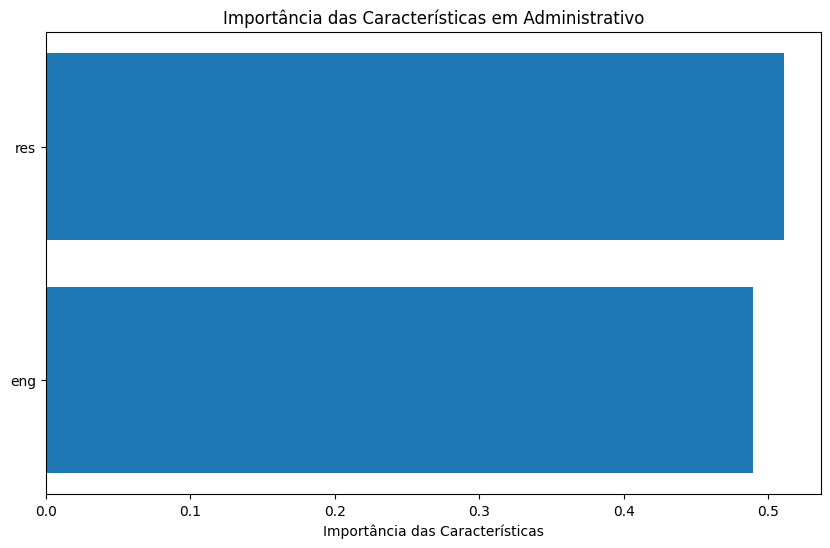

Precisão: 78.95%
Recall: 57.69%
F1: 66.67%
AUC ROC: 100.00%



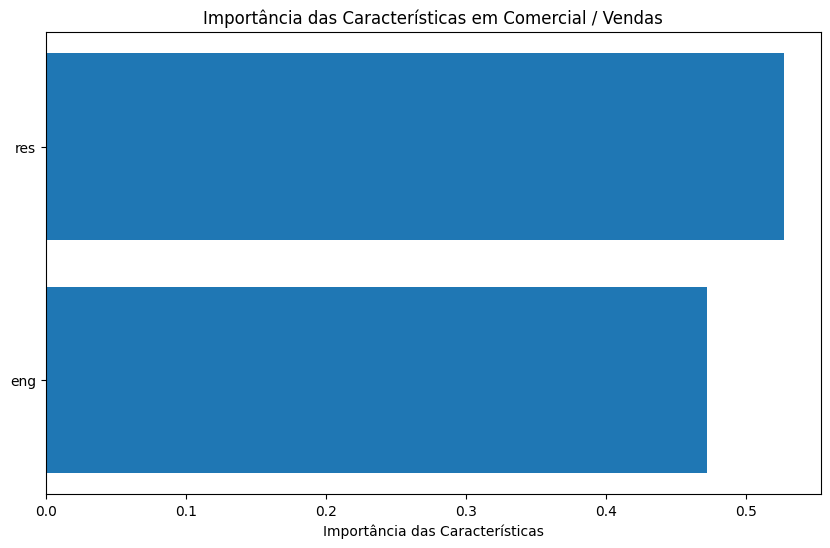

Precisão: 61.90%
Recall: 43.33%
F1: 50.98%
AUC ROC: 100.00%



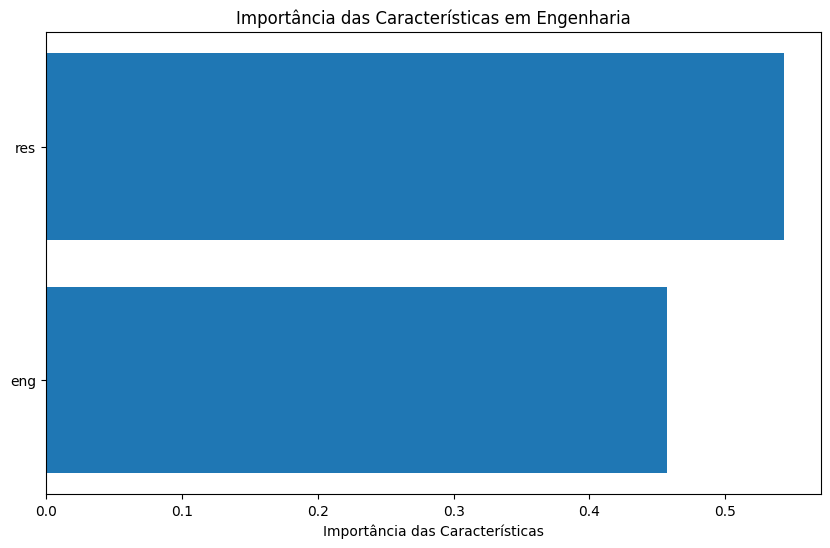

Precisão: 75.00%
Recall: 75.00%
F1: 75.00%
AUC ROC: 99.99%



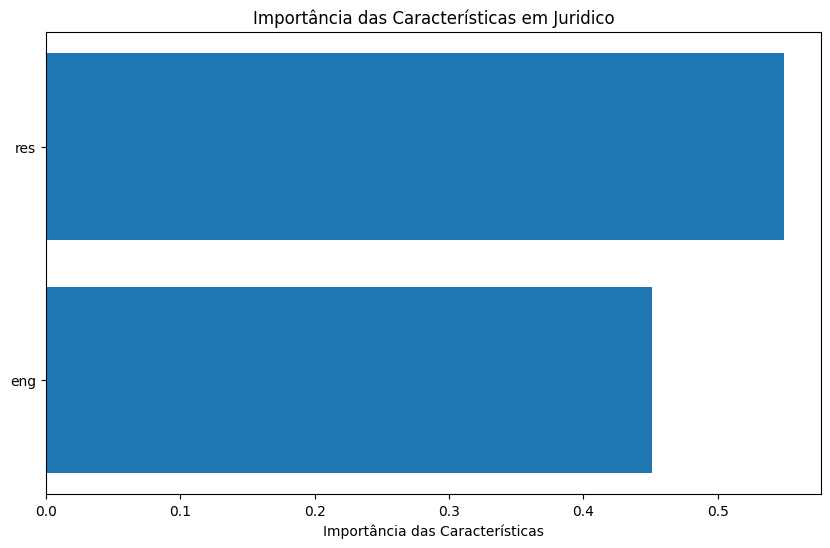

Precisão: 72.41%
Recall: 75.00%
F1: 73.68%
AUC ROC: 99.99%



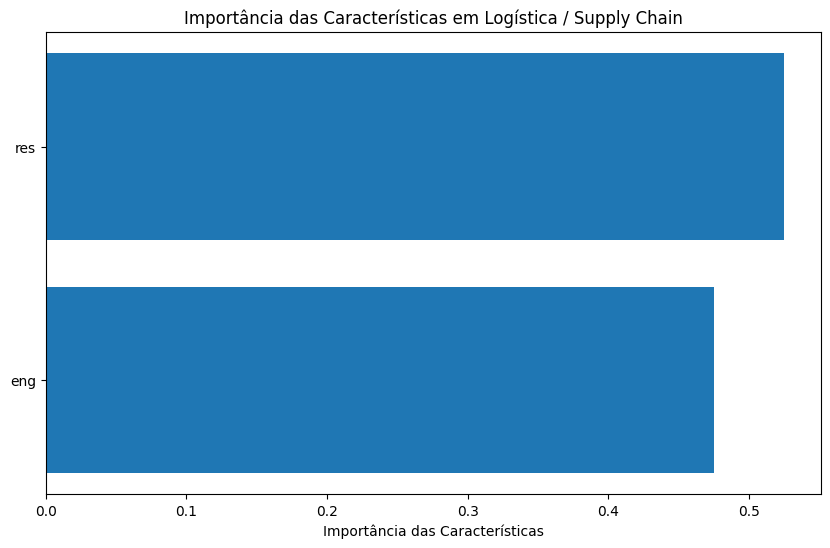

Precisão: 80.00%
Recall: 80.00%
F1: 80.00%
AUC ROC: 100.00%



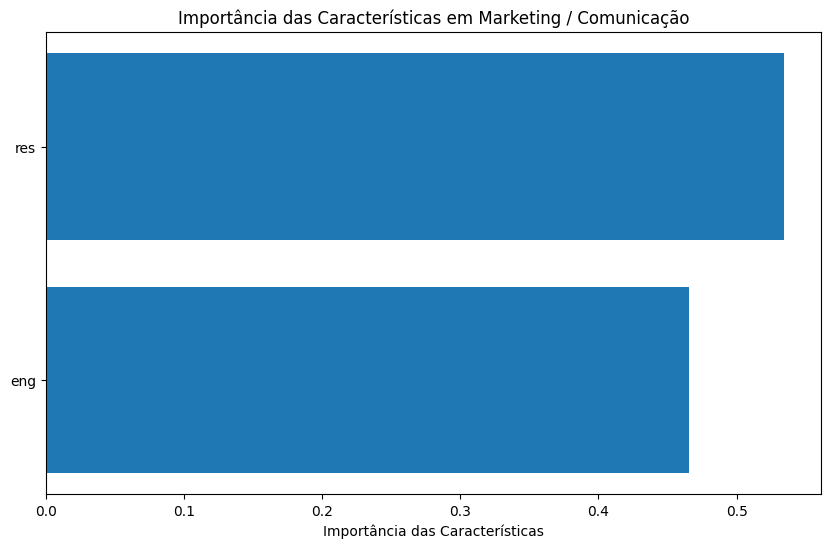

Precisão: 82.61%
Recall: 57.58%
F1: 67.86%
AUC ROC: 99.96%



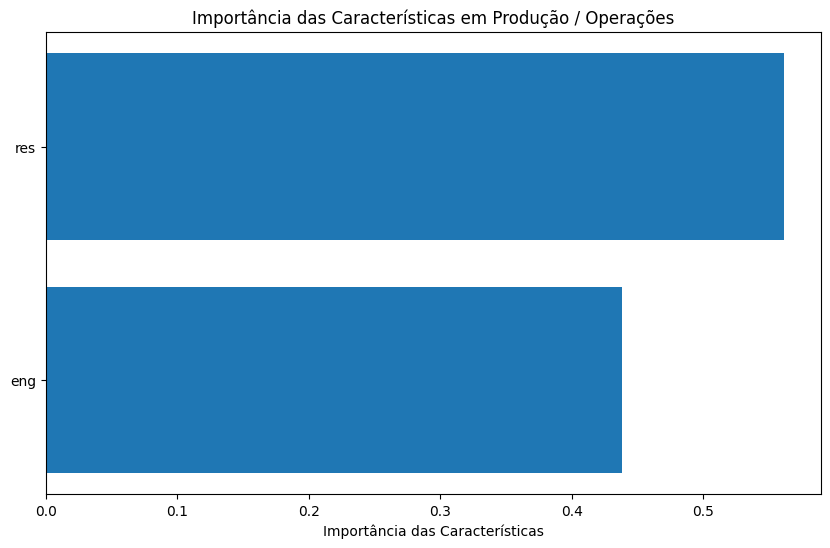

Precisão: 80.00%
Recall: 62.50%
F1: 70.18%
AUC ROC: 100.00%



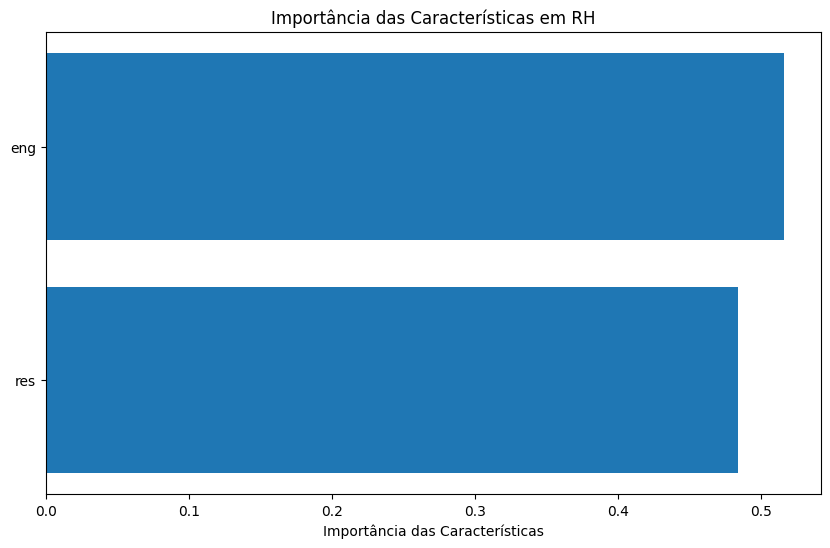

Precisão: 70.83%
Recall: 54.84%
F1: 61.82%
AUC ROC: 100.00%



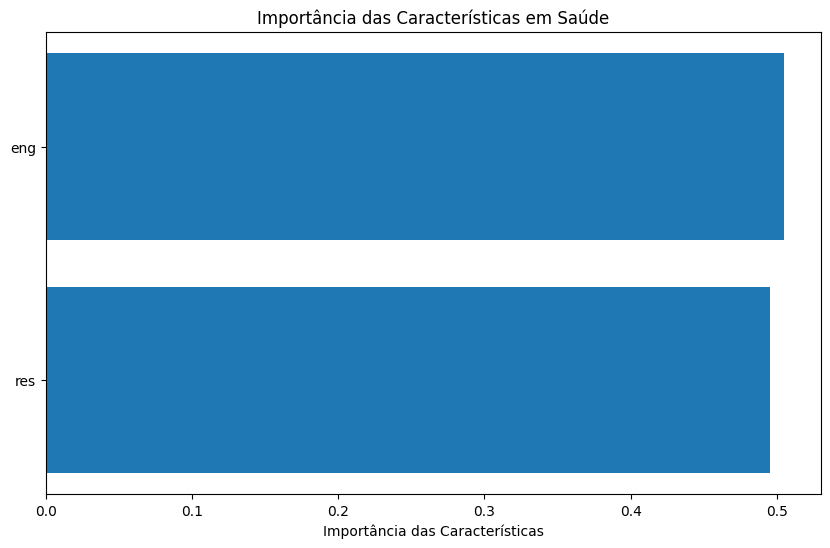

Precisão: 74.07%
Recall: 74.07%
F1: 74.07%
AUC ROC: 100.00%



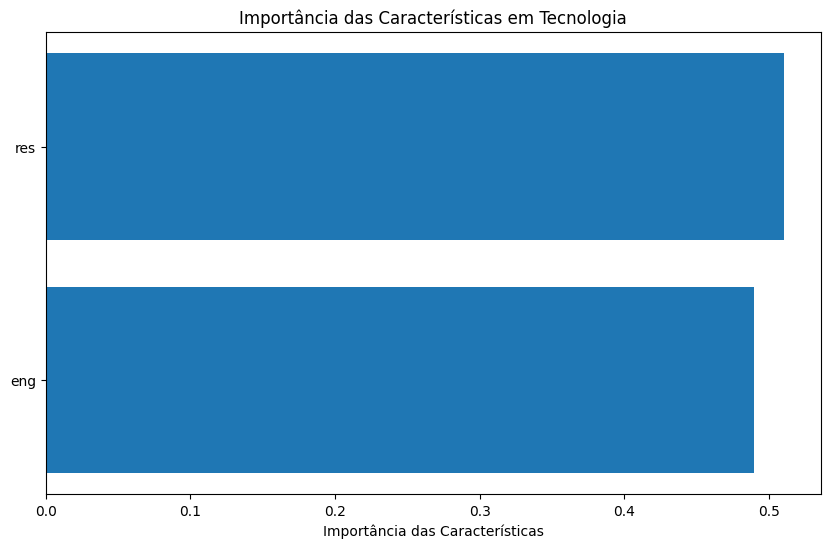

In [ ]:
# Iterar sobre as áreas e calcular a importância das características
for area in areas:
    y = df_job_info[area]

    smote = SMOTE(sampling_strategy='auto', random_state=42)

    # Aplique o SMOTE aos seus dados de treinamento
    X_resampled, y_resampled = smote.fit_resample(X, y)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_resampled)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

    # Defina um espaço de busca para os hiperparâmetros
    param_dist = {
        'n_estimators': np.arange(100, 1000, 100),
        'max_depth': [None] + list(np.arange(10, 110, 10)),
        'min_samples_split': np.arange(2, 11),
        'min_samples_leaf': np.arange(1, 11),
        'bootstrap': [True, False]
    }

    # Crie uma instância do RandomForestClassifier
    clf = RandomForestClassifier(random_state=42)

    # Crie uma instância do RandomizedSearchCV
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)


    precisao = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    probabilidade_classes_positivas = clf.predict_proba(X_train)[:, 1]
    auc_roc = roc_auc_score(y_train, probabilidade_classes_positivas)

    print("Precisão: {:.2f}%".format(precisao * 100))
    print("Recall: {:.2f}%".format(recall * 100))
    print("F1: {:.2f}%".format(f1 * 100))
    print("AUC ROC: {:.2f}%".format(auc_roc * 100))

    importances = clf.feature_importances_
    feature_names = X.columns

    print()

    # Armazenar a importância das características para a área atual
    importance_by_area[area] = list(zip(feature_names, importances))

# Exibir a importância das características para cada área em gráficos
    importances = importance_by_area[area]
    importances.sort(key=lambda x: x[1], reverse=False)  # Classificar por importância

    feature_names, importances = zip(*importances)


    names.append(feature_names)
    important.append(importances)

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_names)), importances, align="center")
    plt.yticks(range(len(feature_names)), feature_names)
    plt.xlabel("Importância das Características")
    plt.title(f"Importância das Características em {area}")
    plt.show()

## Sem PCA e Oversampler

O código a seguir executa as mesmas operações que o código anterior, com uma diferença fundamental: ele não utiliza a Análise de Componentes Principais (PCA). Como resultado, as saídas geradas tendem a ser menos aleatórias em termos de métricas de desempenho.

In [ ]:
names = []
important = []


#RandomForest
# Separando as características das áreas
X = df_job_info.drop(["Administrativo", "Comercial / Vendas", "Engenharia","Juridico",
                  "Logística / Supply Chain", "Marketing / Comunicação", "Produção / Operações",
                  "RH", "Saúde", "Tecnologia", "job_opportunity_id"], axis=1)
#Mapeamento de cada área
areas = ["Administrativo", "Comercial / Vendas", "Engenharia", "Juridico",
        "Logística / Supply Chain", "Marketing / Comunicação", "Produção / Operações",
        "RH", "Saúde", "Tecnologia"]
medias = {}

importance_by_area = {area: [] for area in areas}

In [ ]:
# # Iterar sobre as áreas e calcular a importância das características
# for area in areas:
#     y = df_job_info[area]
#     X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

#     clf = RandomForestClassifier(n_estimators=171, random_state=42)
#     clf.fit(X_treino, y_treino)
#     y_pred = clf.predict(X_teste)


#     # Defina um espaço de busca para os hiperparâmetros
#     param_dist = {
#         'n_estimators': np.arange(100, 1000, 100),
#         'max_depth': [None] + list(np.arange(10, 110, 10)),
#         'min_samples_split': np.arange(2, 11),
#         'min_samples_leaf': np.arange(1, 11),
#         'bootstrap': [True, False]
#     }

#     # Crie uma instância do RandomForestClassifier
#     clf = RandomForestClassifier(random_state=42)

#     # Crie uma instância do RandomizedSearchCV
#     random_search = RandomizedSearchCV(estimator=clf,
#                                       param_distributions=param_dist,
#                                       n_iter=100,  # Número de amostras aleatórias a serem testadas
#                                       scoring='accuracy',  # Métrica de avaliação desejada
#                                       cv=5,  # Número de dobras na validação cruzada
#                                       verbose=2,  # Nível de verbosidade
#                                       n_jobs=-1,  # Use todos os núcleos do processador para paralelizar
#                                       random_state=42)

#     # Ajuste o modelo com os dados de treinamento
#     random_search.fit(X_treino, y_treino)

#     # Obtenha os melhores hiperparâmetros e o melhor modelo
#     best_params = random_search.best_params_
#     best_model = random_search.best_estimator_

#     print("best model: ",best_model)
#     print("best params: ",best_params)

Precisão: 75.00%
Recall: 30.00%
F1: 42.86%
AUC ROC: 73.20%



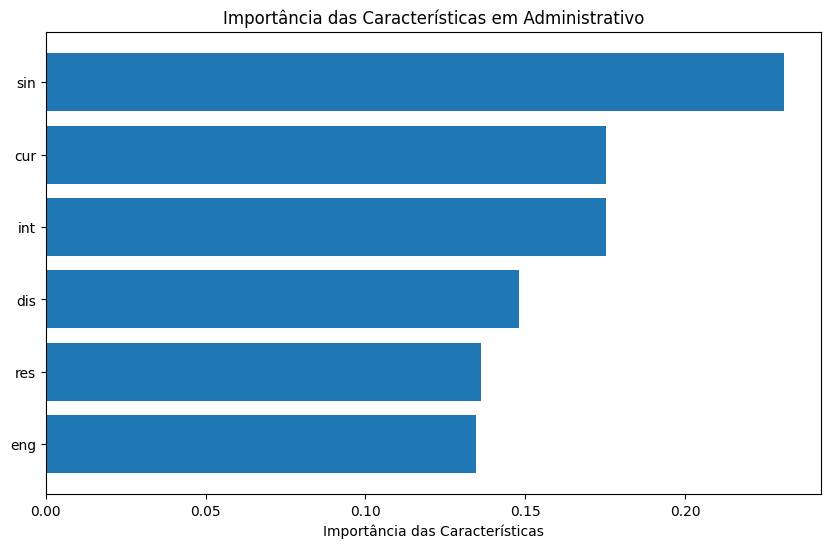

Precisão: 33.33%
Recall: 14.29%
F1: 20.00%
AUC ROC: 48.47%



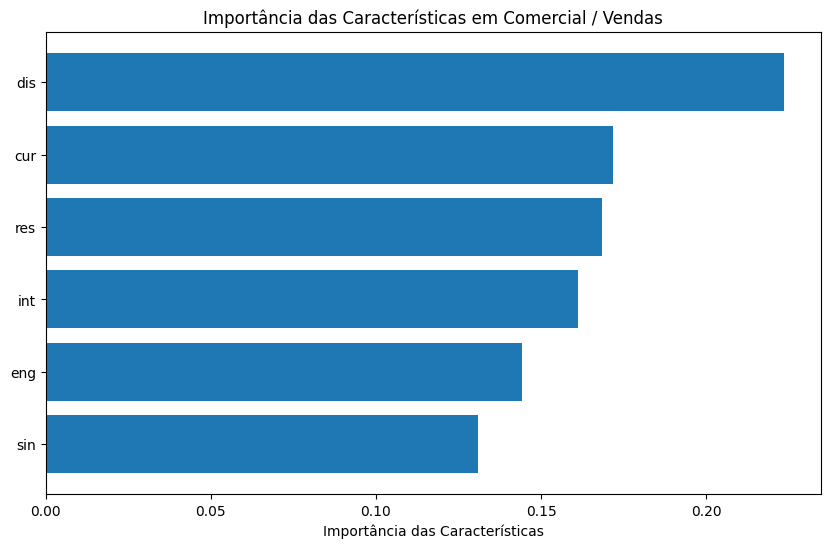

Precisão: 33.33%
Recall: 11.11%
F1: 16.67%
AUC ROC: 30.77%



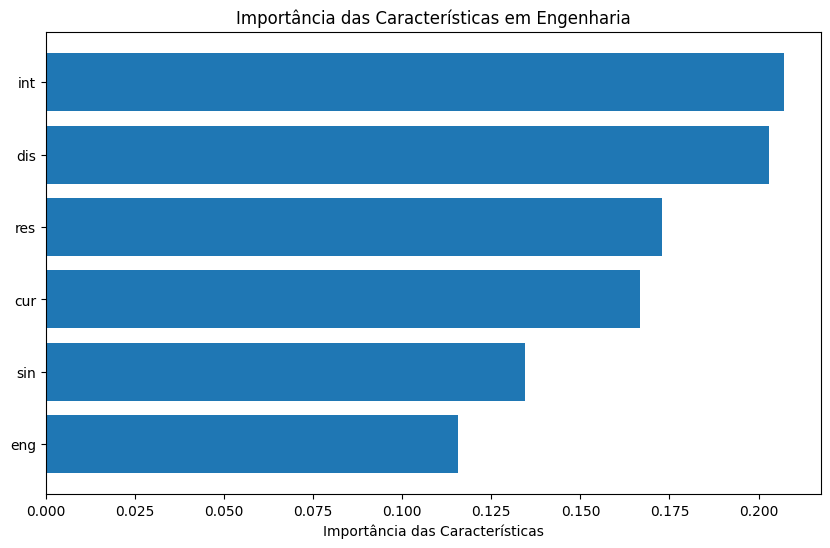

Precisão: 100.00%
Recall: 16.67%
F1: 28.57%
AUC ROC: 58.05%



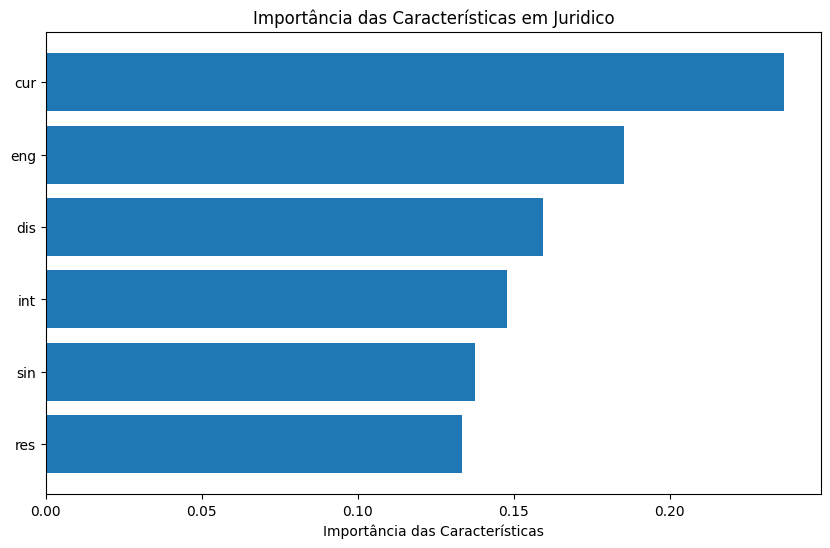

Precisão: 50.00%
Recall: 16.67%
F1: 25.00%
AUC ROC: 58.05%



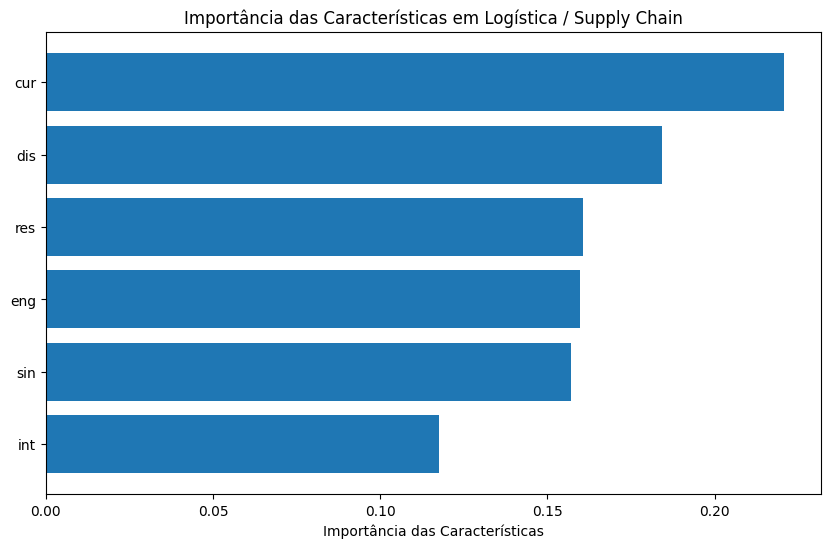

Precisão: 100.00%
Recall: 16.67%
F1: 28.57%
AUC ROC: 48.28%



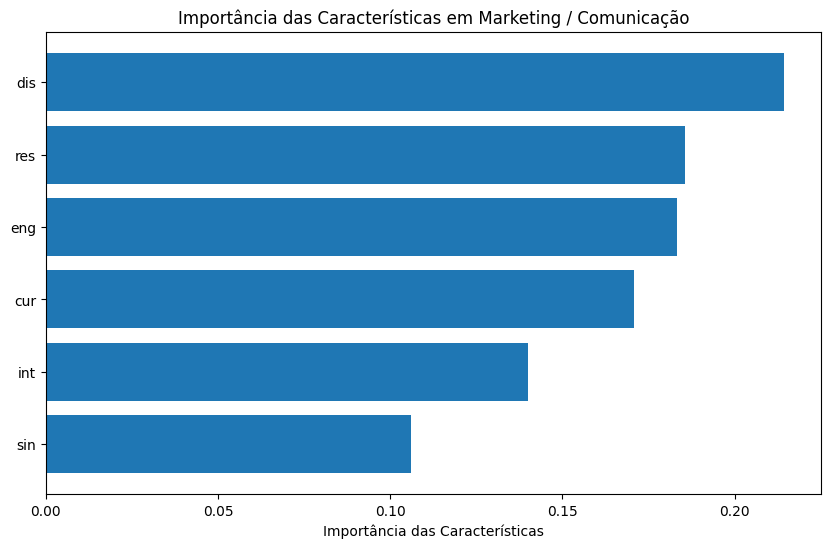

Precisão: 100.00%
Recall: 12.50%
F1: 22.22%
AUC ROC: 49.07%



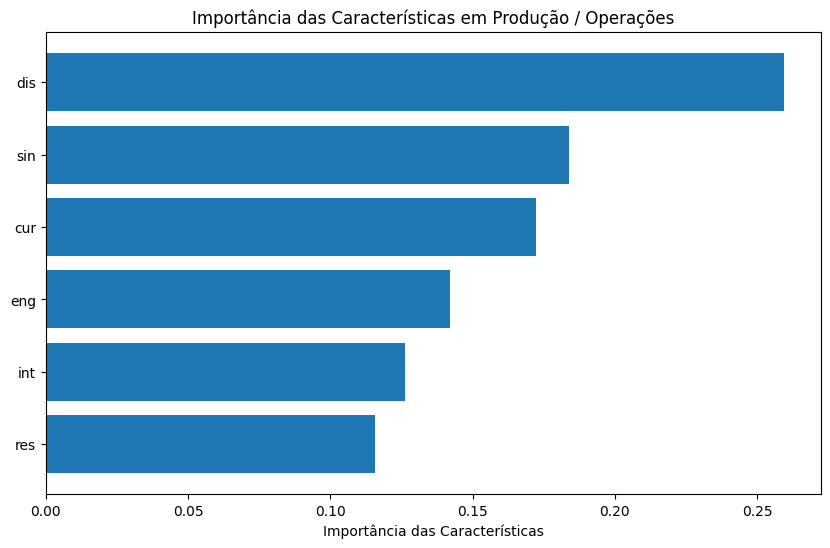

Precisão: 50.00%
Recall: 16.67%
F1: 25.00%
AUC ROC: 54.02%



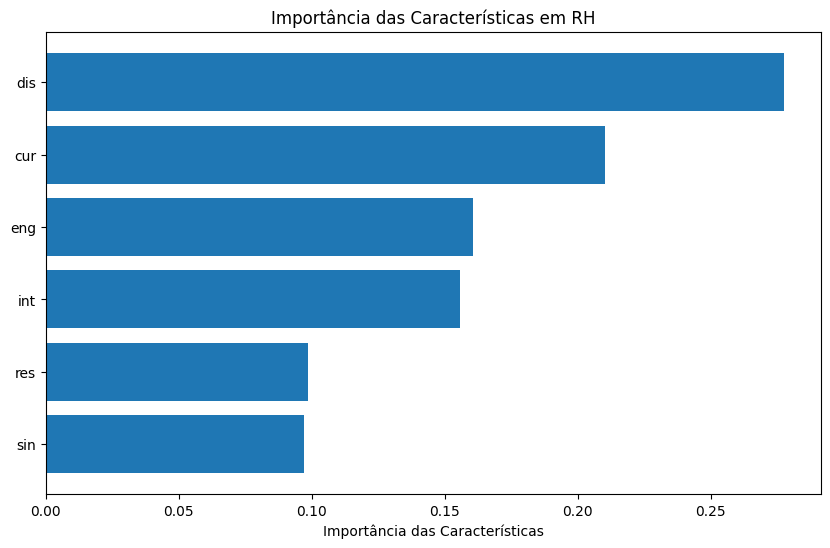

Precisão: 100.00%
Recall: 16.67%
F1: 28.57%
AUC ROC: 54.60%



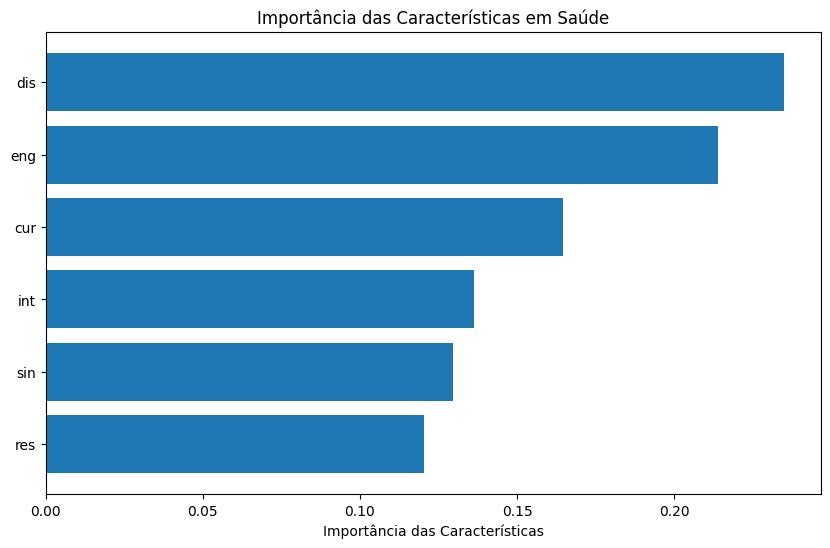

Precisão: 25.00%
Recall: 14.29%
F1: 18.18%
AUC ROC: 58.16%



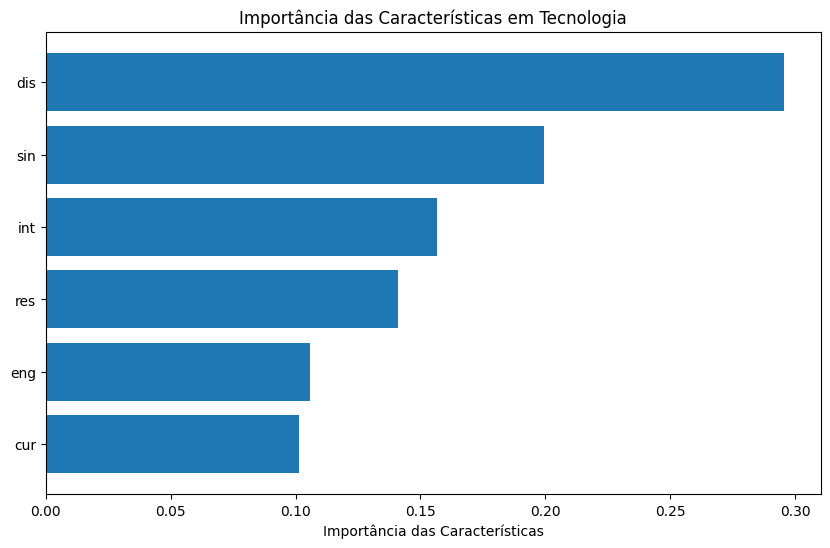

In [ ]:



# Iterar sobre as áreas e calcular a importância das características
for area in areas:
    y = df_job_info[area]
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=600, min_samples_leaf=3, max_depth=100, bootstrap=False, random_state = 42)
    clf.fit(X_treino, y_treino)
    y_pred = clf.predict(X_teste)


    precisao = precision_score(y_teste, y_pred)
    recall = recall_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)
    probabilidade_classes_positivas = clf.predict_proba(X_teste)[:, 1]
    auc_roc = roc_auc_score(y_teste, probabilidade_classes_positivas)

    print("Precisão: {:.2f}%".format(precisao * 100))
    print("Recall: {:.2f}%".format(recall * 100))
    print("F1: {:.2f}%".format(f1 * 100))
    print("AUC ROC: {:.2f}%".format(auc_roc * 100))

    importances = clf.feature_importances_
    feature_names = X.columns

    print()

    # Armazenar a importância das características para a área atual
    importance_by_area[area] = list(zip(feature_names, importances))

# Exibir a importância das características para cada área em gráficos
    importances = importance_by_area[area]
    importances.sort(key=lambda x: x[1], reverse=False)  # Classificar por importância

    feature_names, importances = zip(*importances)


    names.append(feature_names)
    important.append(importances)

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_names)), importances, align="center")
    plt.yticks(range(len(feature_names)), feature_names)
    plt.xlabel("Importância das Características")
    plt.title(f"Importância das Características em {area}")
    plt.show()


As células abaixo recebem os resultados do RandomForest e retornam os cursos mais recomendados para cada usuário de acordo com as competências necessárias para sua área.

In [ ]:
#Definição do usuário a receber recomendações

usuario = df_user_info.iloc[10].to_dict()
area_usuario = [area for area, valor in usuario.items() if valor == 1]
recomendacoes_por_area = {}

# Calcula as recomendações para cada área do usuário
for area in area_usuario:
    importancias_area = importance_by_area.get(area, {})  # Competências mais importantes para a área específica

    recomendacoes = []
    for caracteristica, importancia in importancias_area:
      limite_recomendacao = importancia * 3         #([1 + importancia]*media de atributos)
      if usuario.get(caracteristica, 0) < limite_recomendacao:  # Se a pontuação do usuário na competência for menor do que a definida
            recomendacoes.append(caracteristica)


    recomendacoes_por_area[area] = recomendacoes
print(recomendacoes_por_area.items())

print("id: ", usuario)


dict_items([('Engenharia', ['int']), ('Logistica / Supply Chain', []), ('Produção / Operações', ['dis'])])
id:  {'id': 1011840.0, 'dis': 0.7555555555555555, 'sin': 0.5555555555555556, 'cur': 0.5531914893617021, 'int': 0.6086956521739131, 'eng': 0.5909090909090909, 'res': 0.6097560975609756, 'Administrativo': 0.0, 'Comercial / Vendas': 0.0, 'Engenharia': 1.0, 'Finanças / Contabilidade': 0.0, 'Jurídico': 0.0, 'Logistica / Supply Chain': 1.0, 'Marketing / Comunicação': 0.0, 'Produção / Operações': 1.0, 'RH': 0.0, 'Saúde': 0.0, 'Tecnologia': 0.0}


In [ ]:
#Define quais competências são mais importantes por área
recomendar = {}
for area in recomendacoes_por_area:
    recomendar[area] = {
        "dis": 0,
        "int": 0,
        "eng": 0,
        "res": 0,
        "cur": 0,
        "sin": 0
    }

recomendacoes_sum = 0

for area, recomendacoes in recomendacoes_por_area.items():
    for recomendacao in recomendacoes:
        recomendar[area][recomendacao] += 1
        recomendacoes_sum += 1

recomendacoes_sum

2

In [ ]:
df_recomendar = pd.DataFrame(recomendar).T


# if recomendacoes_sum <= 1:

#     df_recomendar = None
#     recomendar = {}
#    # Crie um DataFrame com os dados do 'usuario'
#     df = pd.DataFrame([usuario]).drop(columns = ["Administrativo",	"Comercial / Vendas",	"Engenharia",	"Finanças / Contabilidade",	"Jurídico",	"Logistica / Supply Chain",	"Marketing / Comunicação",	"Produção / Operações",	"RH",	"Saúde",	"Tecnologia"])

#     # Use .nsmallest(2) para encontrar as duas menores colunas em 'df'
#     lowest = df.iloc[0].nsmallest(2)

#     # Obtenha os nomes das duas colunas com os menores valores
#     lowest_names = lowest.index.tolist()

#     # Verifique se cada coluna em 'lowest_names' existe em 'recomendar'
#     for low in lowest_names:
#         # Incrementar os valores correspondentes em 'recomendar'
#         recomendar["Recomendar"][low] += 1
#     df_recomendar = pd.DataFrame(recomendar).T

#Calcula as áreas de prefêrencia do usuário
print(recomendar)
print(df_recomendar)
user_area_preferences = df_recomendar.sum()
print(user_area_preferences)
# Calcula a relevância de cada curso para a área
course_area_relevance = df_cursos_for_you.drop(columns=['id'])  # Remove the 'id' column
print(course_area_relevance)
course_area_relevance = course_area_relevance * user_area_preferences  # Multiply by user preferences
print(course_area_relevance)
# Calcula valores dos cursos
course_scores = course_area_relevance.sum(axis=1)

# Organiza e recomenda cursos
recommended_courses = df_cursos_for_you[['id']].copy()  # Create a new DataFrame with the 'id' column
recommended_courses['score'] = course_scores
recommended_courses = recommended_courses.sort_values(by='score', ascending= False)
top_n_recommendations = recommended_courses.head(5)  # Choose the top N courses to recommend

top_n_recommendations



{'Engenharia': {'dis': 0, 'int': 1, 'eng': 0, 'res': 0, 'cur': 0, 'sin': 0}, 'Logistica / Supply Chain': {'dis': 0, 'int': 0, 'eng': 0, 'res': 0, 'cur': 0, 'sin': 0}, 'Produção / Operações': {'dis': 1, 'int': 0, 'eng': 0, 'res': 0, 'cur': 0, 'sin': 0}}
                          dis  int  eng  res  cur  sin
Engenharia                  0    1    0    0    0    0
Logistica / Supply Chain    0    0    0    0    0    0
Produção / Operações        1    0    0    0    0    0
dis    1
int    1
eng    0
res    0
cur    0
sin    0
dtype: int64
     eng  int  cur  dis  res  sin
0      0    0    0    1    0    1
1      1    1    0    0    0    1
2      0    1    0    0    1    0
3      0    1    0    0    0    0
5      0    0    1    0    0    1
..   ...  ...  ...  ...  ...  ...
193    0    0    0    0    0    1
197    1    1    0    1    0    0
200    1    1    0    0    0    0
203    0    0    0    1    0    1
206    1    1    0    0    0    0

[122 rows x 6 columns]
     cur  dis  eng  int  res

,id,score
35,243,2
172,793,2
140,884,2
112,523,2
168,310,2


In [ ]:
#Recomendação dos cursos para o usuário
print("para o seguinte usuário:\n",usuario,"\n\ntemos as seguintes recomendações: \n")
recomendations = top_n_recommendations["id"].to_list()
for id in recomendations:
  print(df_cursos_name[df_cursos_name["id"] == id])



para o seguinte usuário:
 {'id': 1011840.0, 'dis': 0.7555555555555555, 'sin': 0.5555555555555556, 'cur': 0.5531914893617021, 'int': 0.6086956521739131, 'eng': 0.5909090909090909, 'res': 0.6097560975609756, 'Administrativo': 0.0, 'Comercial / Vendas': 0.0, 'Engenharia': 1.0, 'Finanças / Contabilidade': 0.0, 'Jurídico': 0.0, 'Logistica / Supply Chain': 1.0, 'Marketing / Comunicação': 0.0, 'Produção / Operações': 1.0, 'RH': 0.0, 'Saúde': 0.0, 'Tecnologia': 0.0} 

temos as seguintes recomendações: 

                                                 name   id
35  Programa de Aceleração de Carreira B3 - Soft S...  243
                                  name   id
172  Negros no Topo | 3ª edição - 2022  793
                                             name   id
140  Fluxo de Trabalho | Gestão do Tempo Rodobens  884
                                                  name   id
112  Bem-vindo(a) ao Programa de capacitação para n...  523
                                     name   id
168  Mindset Ági

# KNN

O código apresentado utiliza K-Nearest Neighbors (KNN), um algoritmo de aprendizado supervisionado que classifica novos pontos de dados com base na proximidade com os pontos de dados de treinamento.

Abaixo, o algoritmo calcula as importâncias das competências para cada área e, em seguida, identifica as preferências do usuário com base em suas habilidades.

Com base nesses dados, o código calcula a relevância de cursos para cada área e pontua os cursos. As recomendações são classificadas por relevância, oferecendo ao usuário uma lista de cursos mais alinhados com suas competências e interesses.  
Essa abordagem ajuda a direcionar o usuário para cursos que se adequam melhor ao seu perfil, otimizando sua experiência de aprendizado ou desenvolvimento profissional.

In [ ]:
# Suponha que 'df_job_info' seja o DataFrame com os dados e 'areas' seja a lista de áreas que você está prevendo
X = df_job_info.drop(["Administrativo", "Comercial / Vendas", "Engenharia", "Juridico",
                      "Logística / Supply Chain", "Marketing / Comunicação", "Produção / Operações",
                      "RH", "Saúde", "Tecnologia", "job_opportunity_id"], axis=1)

caracteristicas = ["res", "eng", "int", "cur", "sin", "dis"]

feature_importance_dict = {"Administrativo": {},
                           "Comercial / Vendas":{},
                           "Engenharia":{},
                           "Juridico":{},
                           "Logística / Supply Chain":{},
                           "Marketing / Comunicação":{},
                           "Produção / Operações":{},
                           "RH":{},
                           "Saúde":{},
                           "Tecnologia":{}
                           }

for area in areas:
    y = df_job_info[area]

    smote = SMOTE(sampling_strategy='auto', random_state=42)

    # Aplique o SMOTE aos seus dados de treinamento
    X_resampled, y_resampled = smote.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Crie um classificador KNN com um determinado número de vizinhos (n_neighbors)
    param_grid = {
    'n_neighbors': range(1, 31),       # Número de vizinhos
    'weights': ['uniform', 'distance'], # Peso dos vizinhos
    'p': [1, 2]                         # Métrica de distância (1 para distância Manhattan, 2 para distância Euclidiana)
    }

    # Crie um classificador KNN
    knn = KNeighborsClassifier()

    # Escolha entre Grid Search ou Random Search
    # Grid Search

    # Random Search
    random_search = RandomizedSearchCV(knn, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1)
    random_search.fit(X_train, y_train)

    # Exiba os melhores hiperparâmetros encontrados
    print("Melhores hiperparâmetros encontrados (Random Search):")
    print(random_search.best_params_)

    # Use o modelo com os melhores hiperparâmetros para fazer previsões
    best_knn_random = random_search.best_estimator_

    # Avalie o modelo com os melhores hiperparâmetros
    accuracy_random = best_knn_random.score(X_test, y_test)

    print(f"Acurácia do modelo com os melhores hiperparâmetros (Random Search): {accuracy_random}")



Melhores hiperparâmetros encontrados (Random Search):
{'weights': 'uniform', 'p': 1, 'n_neighbors': 1}
Acurácia do modelo com os melhores hiperparâmetros (Random Search): 0.88
Melhores hiperparâmetros encontrados (Random Search):
{'weights': 'uniform', 'p': 2, 'n_neighbors': 1}
Acurácia do modelo com os melhores hiperparâmetros (Random Search): 0.7857142857142857
Melhores hiperparâmetros encontrados (Random Search):
{'weights': 'uniform', 'p': 2, 'n_neighbors': 4}
Acurácia do modelo com os melhores hiperparâmetros (Random Search): 0.7777777777777778
Melhores hiperparâmetros encontrados (Random Search):
{'weights': 'uniform', 'p': 2, 'n_neighbors': 2}
Acurácia do modelo com os melhores hiperparâmetros (Random Search): 0.8666666666666667
Melhores hiperparâmetros encontrados (Random Search):
{'weights': 'uniform', 'p': 1, 'n_neighbors': 4}
Acurácia do modelo com os melhores hiperparâmetros (Random Search): 0.7586206896551724
Melhores hiperparâmetros encontrados (Random Search):
{'weights'

Melhor n_neighbors(que melhor se adapta a mais situações), 2 e melhor P, tambem igual a 2, ou seja, a metrica será a distancia euclidina!

In [ ]:
# Suponha que 'df_job_info' seja o DataFrame com os dados e 'areas' seja a lista de áreas que você está prevendo
X = df_job_info.drop(["Administrativo", "Comercial / Vendas", "Engenharia", "Juridico",
                      "Logística / Supply Chain", "Marketing / Comunicação", "Produção / Operações",
                      "RH", "Saúde", "Tecnologia", "job_opportunity_id"], axis=1)

caracteristicas = ["res", "eng", "int", "cur", "sin", "dis"]

feature_importance_dict = {"Administrativo": {},
                           "Comercial / Vendas":{},
                           "Engenharia":{},
                           "Juridico":{},
                           "Logística / Supply Chain":{},
                           "Marketing / Comunicação":{},
                           "Produção / Operações":{},
                           "RH":{},
                           "Saúde":{},
                           "Tecnologia":{}
                           }

for area in areas:
    y = df_job_info[area]

    smote = SMOTE(sampling_strategy='auto', random_state=42)

    # Aplique o SMOTE aos seus dados de treinamento
    X_resampled, y_resampled = smote.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Crie um classificador KNN com um determinado número de vizinhos (n_neighbors)
    knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')

    # Treine o classificador com os dados de treinamento
    knn.fit(X_train, y_train)


    y_pred_train = knn.predict(X_train)

    # Calcule a acurácia das previsões
    print("train")
    y_pred_train_pos = knn.predict_proba(X_train)[:,1]

    # Calcule o recall nas previsões de treinamento usando y_train como os rótulos verdadeiros
    recall_train = recall_score(y_train, y_pred_train)

    print(f'\n \n {area}\nRecall no treinamento: {recall_train}')


    auc_roc = roc_auc_score(y_train, y_pred_train_pos)
    print(f'AUC-ROC Score: {auc_roc}')

    f1 = f1_score(y_train, y_pred_train)
    print("F1-score:", f1, "\n")

    confusion = confusion_matrix(y_train, y_pred_train)
    print(f'Matriz de Confusão para {area}:\n{confusion} \n \n')


    y_pred_test = knn.predict(X_test)
    y_pred_test_pos = knn.predict_proba(X_test)[:,1]

    # Calcule a acurácia das previsões
    print("test")
    # Calcule o recall nas previsões de teste usando y_test como os rótulos verdadeiros
    recall_test = recall_score(y_test, y_pred_test)

    print(f'\n \n {area}\nRecall no teste: {recall_test}')

    accuracy = accuracy_score(y_test, y_pred_test)
    auc_roc = roc_auc_score(y_test, y_pred_test_pos)
    print(f'AUC-ROC Score: {auc_roc}')

    f1 = f1_score(y_test, y_pred_test)
    print("F1-score:", f1, "\n")

    confusion = confusion_matrix(y_test, y_pred_test)
    print(f'Matriz de Confusão para {area}:\n{confusion} \n \n')

    # Calcule a importância das características
    baseline_accuracy = accuracy

    for feature in caracteristicas:
        X_temp = X_test.copy()
        np.random.shuffle(X_temp[feature].values)  # Permuta os valores da característica


        perturbed_accuracy = accuracy_score(y_test, knn.predict(X_temp))
        feature_importance = baseline_accuracy - perturbed_accuracy
        feature_importance_dict[area][feature] = feature_importance

train

 
 Administrativo
Recall no treinamento: 0.8969072164948454
AUC-ROC Score: 0.9800959477391038
F1-score: 0.9456521739130436 

Matriz de Confusão para Administrativo:
[[101   0]
 [ 10  87]] 
 

test

 
 Administrativo
Recall no teste: 0.8518518518518519
AUC-ROC Score: 0.8864734299516909
F1-score: 0.9019607843137256 

Matriz de Confusão para Administrativo:
[[22  1]
 [ 4 23]] 
 

train

 
 Comercial / Vendas
Recall no treinamento: 0.9553571428571429
AUC-ROC Score: 0.9929728835978835
F1-score: 0.9771689497716896 

Matriz de Confusão para Comercial / Vendas:
[[108   0]
 [  5 107]] 
 

test

 
 Comercial / Vendas
Recall no teste: 0.6923076923076923
AUC-ROC Score: 0.7923076923076924
F1-score: 0.7199999999999999 

Matriz de Confusão para Comercial / Vendas:
[[24  6]
 [ 8 18]] 
 

train

 
 Engenharia
Recall no treinamento: 0.9142857142857143
AUC-ROC Score: 0.9849420849420849
F1-score: 0.955223880597015 

Matriz de Confusão para Engenharia:
[[111   0]
 [  9  96]] 
 

test

 
 Engenharia


In [ ]:
usuario = df_user_info.iloc[10].to_dict()
area_usuario = [area for area, valor in usuario.items() if valor == 1]
recomendacoes_por_area = {}

# Calcula as recomendações para cada área do usuário
for area in area_usuario:
    importancias_area = feature_importance_dict.get(area, {})  # Competências mais importantes para a área específica

    recomendacoes = []
    for caracteristica, importancia in importancias_area.items():
      limite_recomendacao = importancia * 5
      if usuario.get(caracteristica, 0) < limite_recomendacao:  # Se a pontuação do usuário na competência for menor do que a definida
            recomendacoes.append(caracteristica)


    recomendacoes_por_area[area] = recomendacoes
print(usuario)
print(recomendacoes_por_area.items())

{'id': 1011840.0, 'dis': 0.7555555555555555, 'sin': 0.5555555555555556, 'cur': 0.5531914893617021, 'int': 0.6086956521739131, 'eng': 0.5909090909090909, 'res': 0.6097560975609756, 'Administrativo': 0.0, 'Comercial / Vendas': 0.0, 'Engenharia': 1.0, 'Finanças / Contabilidade': 0.0, 'Jurídico': 0.0, 'Logistica / Supply Chain': 1.0, 'Marketing / Comunicação': 0.0, 'Produção / Operações': 1.0, 'RH': 0.0, 'Saúde': 0.0, 'Tecnologia': 0.0}
dict_items([('Engenharia', ['cur']), ('Logistica / Supply Chain', []), ('Produção / Operações', ['res', 'cur', 'sin', 'dis'])])


In [ ]:
#Define quais competências
recomendar = {}
for area in recomendacoes_por_area:
    recomendar[area] = {
        "dis": 0,
        "int": 0,
        "eng": 0,
        "res": 0,
        "cur": 0,
        "sin": 0
    }

recomendacoes_sum = 0

for area, recomendacoes in recomendacoes_por_area.items():
    for recomendacao in recomendacoes:
        recomendar[area][recomendacao] += 1
        recomendacoes_sum += 1

recomendacoes_sum

5

In [ ]:
df_recomendar = pd.DataFrame(recomendar).T

#Calcula as áreas de prefêrencia do usuário
print(recomendar)
print(df_recomendar)
user_area_preferences = df_recomendar.sum()
print(user_area_preferences)
# Calcula a relevância de cada curso para a área
course_area_relevance = df_cursos_for_you.drop(columns=['id'])  # Remove the 'id' column
print(course_area_relevance)
course_area_relevance = course_area_relevance * user_area_preferences  # Multiply by user preferences
print(course_area_relevance)
# Calcula valores dos cursos
course_scores = course_area_relevance.sum(axis=1)

# Organiza e recomenda cursos
recommended_courses = df_cursos_for_you[['id']].copy()  # Create a new DataFrame with the 'id' column
recommended_courses['score'] = course_scores
recommended_courses = recommended_courses.sort_values(by='score', ascending= False)

melhorias = []

print(recommended_courses)

# for index, row in recommended_courses.iterrows():
#   id = row[0]
#   comparacao = df_cursos[df_cursos["id"] == id]
#   print(comparacao)



{'Engenharia': {'dis': 0, 'int': 0, 'eng': 0, 'res': 0, 'cur': 1, 'sin': 0}, 'Logistica / Supply Chain': {'dis': 0, 'int': 0, 'eng': 0, 'res': 0, 'cur': 0, 'sin': 0}, 'Produção / Operações': {'dis': 1, 'int': 0, 'eng': 0, 'res': 1, 'cur': 1, 'sin': 1}}
                          dis  int  eng  res  cur  sin
Engenharia                  0    0    0    0    1    0
Logistica / Supply Chain    0    0    0    0    0    0
Produção / Operações        1    0    0    1    1    1
dis    1
int    0
eng    0
res    1
cur    2
sin    1
dtype: int64
     eng  int  cur  dis  res  sin
0      0    0    0    1    0    1
1      1    1    0    0    0    1
2      0    1    0    0    1    0
3      0    1    0    0    0    0
5      0    0    1    0    0    1
..   ...  ...  ...  ...  ...  ...
193    0    0    0    0    0    1
197    1    1    0    1    0    0
200    1    1    0    0    0    0
203    0    0    0    1    0    1
206    1    1    0    0    0    0

[122 rows x 6 columns]
     cur  dis  eng  int  res

In [ ]:
print("para o seguinte usuário:\n",usuario,"\n\ntemos as seguintes recomendações: \n")
recomendations = top_n_recommendations["id"].to_list()
for id in recomendations:
  print(df_cursos_name[df_cursos_name["id"] == id])

para o seguinte usuário:
 {'id': 1011840.0, 'dis': 0.7555555555555555, 'sin': 0.5555555555555556, 'cur': 0.5531914893617021, 'int': 0.6086956521739131, 'eng': 0.5909090909090909, 'res': 0.6097560975609756, 'Administrativo': 0.0, 'Comercial / Vendas': 0.0, 'Engenharia': 1.0, 'Finanças / Contabilidade': 0.0, 'Jurídico': 0.0, 'Logistica / Supply Chain': 1.0, 'Marketing / Comunicação': 0.0, 'Produção / Operações': 1.0, 'RH': 0.0, 'Saúde': 0.0, 'Tecnologia': 0.0} 

temos as seguintes recomendações: 

                                                 name   id
35  Programa de Aceleração de Carreira B3 - Soft S...  243
                                  name   id
172  Negros no Topo | 3ª edição - 2022  793
                                             name   id
140  Fluxo de Trabalho | Gestão do Tempo Rodobens  884
                                                  name   id
112  Bem-vindo(a) ao Programa de capacitação para n...  523
                                     name   id
168  Mindset Ági